In [ ]:
import os
os.chdir("/content/drive/MyDrive/code/DLI/project2")

In [ ]:
# %%shell
# git clone https://github.com/caozx1110/NeedForSpeedAI.git

In [ ]:
import os
os.chdir("/content/drive/MyDrive/code/DLI/project2/NeedForSpeedAI/App")

In [ ]:
# from ModelTest import *
# rawdata2dataset()

In [ ]:
import os
os.chdir("/content/drive/MyDrive/code/DLI/project2/NeedForSpeedAI/DriveNet")

In [ ]:
from DriveNet import DriveNet
from dataset import nfs_cls_dataset
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, models
import torchvision.transforms as F
from torch.utils.data import Dataset, DataLoader
from torch import nn
from PIL import Image

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

### utils

In [ ]:
def Train(loader_train, loader_val, model, criterion, optimizer, max_epoch):
    # Train mode
    model.train()
    # to record the change(to be drawn)
    loss_list, accu_list, val_accu_list = [], [], []
    for epoch in range(max_epoch):
        accu_num = 0
        loss_sum = 0
        # one epoch
        for data, label in loader_train:
            data, label = data.type(torch.FloatTensor).to(DEVICE), label.to(DEVICE)
            # print(data.shape)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, label)
            loss.backward()
            # 更新
            optimizer.step()
            # 放回cpu
            loss_sum += loss.cpu().item()
            predict = torch.argmax(output, dim=1)
            accu_num += (predict == label).sum().item()
        
        epoch_loss = loss_sum / len(loader_train.dataset)
        epoch_accu = accu_num / len(loader_train.dataset)
        val_accu = Test(loader_val, model)
        print('epoch: {} train loss: {:.6f}, train accuracy {:.6f} validation accuracy: {:.6f}'.
              format(epoch + 1, epoch_loss, epoch_accu, val_accu))
        loss_list.append(epoch_loss)
        accu_list.append(epoch_accu)
        val_accu_list.append(val_accu)
    return loss_list, accu_list, val_accu_list

In [ ]:
def Test(loader_test, model, is_print=False):
    # mode
    model.eval()
    accu_num = 0
    with torch.no_grad():
        for idx, (data, label) in enumerate(loader_test):
            data, label = data.type(torch.FloatTensor).to(DEVICE), label.to(DEVICE)
            output = model(data)
            if is_print:
                print(torch.argmax(output, dim=1))
            accu_num += torch.sum(torch.argmax(output, dim=1) == label.data)
    accu_num = accu_num.cpu().item()
    test_accu = accu_num / len(loader_test.dataset)

    return test_accu

In [ ]:
def Draw(loss_list, accuracy_list, val_list=None):
    plt.subplot(211)
    epoch_list = [i for i in range(len(loss_list))]
    plt.plot(epoch_list, loss_list, label='loss', c='r')
    plt.legend()
    plt.subplot(212)
    plt.plot(epoch_list, accuracy_list, label='accuracy', c='b')
    # plt.tight_layout()
    plt.legend()
    plt.show()
    if val_list is not None:
        plt.subplot(111)
        tx = [i for i in range(len(val_list))]
        plt.plot(tx, val_list, label='val', c='g')
        plt.legend()
        plt.show()

### train

In [ ]:
batch_size = 8
lr = 0.001

In [ ]:
val_dataset = nfs_cls_dataset('../Data/drive/', 'val', F.ToTensor())
print(len(val_dataset))

len 373
373


In [ ]:
test_dataset = nfs_cls_dataset('../Data/drive/', 'test', F.ToTensor())
print(len(test_dataset))

len 748
748


In [ ]:
train_dataset = nfs_cls_dataset('../Data/drive/', 'train', F.ToTensor())
print(len(train_dataset))
# val_dataset = nfs_cls_dataset('../Data/drive/', 'val', F.ToTensor())
# test_dataset = nfs_cls_dataset('../Data/drive/', 'test', F.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=4)

len 6252
6252


In [ ]:
for item in train_dataset:
    print(item[0].shape)
    break
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

torch.Size([1, 480, 640])
6252
373
748


In [ ]:
max = 0

epoch: 1 train loss: 0.010601, train accuracy 0.952495 validation accuracy: 0.697051
epoch: 2 train loss: 0.018508, train accuracy 0.929623 validation accuracy: 0.686327
epoch: 3 train loss: 0.004981, train accuracy 0.972649 validation accuracy: 0.726542
epoch: 4 train loss: 0.002439, train accuracy 0.987204 validation accuracy: 0.697051
epoch: 5 train loss: 0.014981, train accuracy 0.935541 validation accuracy: 0.718499
test accu 0.7005347593582888


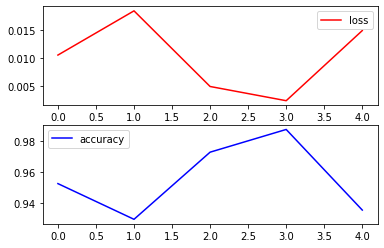

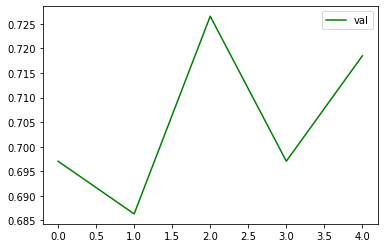

epoch: 1 train loss: 0.006061, train accuracy 0.975848 validation accuracy: 0.713137
epoch: 2 train loss: 0.001744, train accuracy 0.993762 validation accuracy: 0.721180
epoch: 3 train loss: 0.000582, train accuracy 0.998560 validation accuracy: 0.734584
epoch: 4 train loss: 0.017646, train accuracy 0.931062 validation accuracy: 0.699732
epoch: 5 train loss: 0.011981, train accuracy 0.944498 validation accuracy: 0.664879
test accu 0.6911764705882353


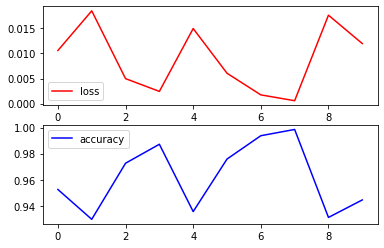

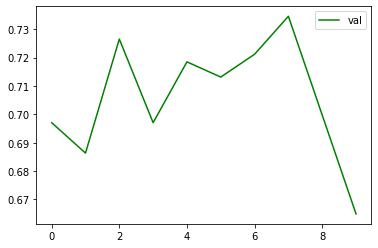

epoch: 1 train loss: 0.005388, train accuracy 0.978087 validation accuracy: 0.731903
epoch: 2 train loss: 0.001071, train accuracy 0.996801 validation accuracy: 0.726542
epoch: 3 train loss: 0.000227, train accuracy 1.000000 validation accuracy: 0.726542
epoch: 4 train loss: 0.000088, train accuracy 1.000000 validation accuracy: 0.729223
epoch: 5 train loss: 0.000041, train accuracy 1.000000 validation accuracy: 0.729223
test accu 0.7205882352941176


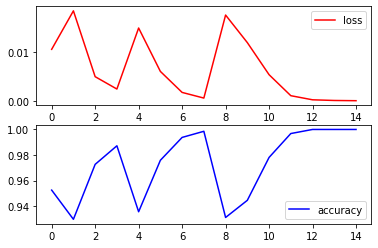

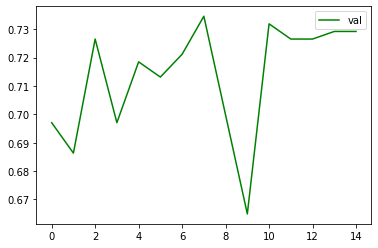

epoch: 1 train loss: 0.020770, train accuracy 0.920825 validation accuracy: 0.694370
epoch: 2 train loss: 0.009334, train accuracy 0.958413 validation accuracy: 0.702413
epoch: 3 train loss: 0.002170, train accuracy 0.991203 validation accuracy: 0.747989
epoch: 4 train loss: 0.001063, train accuracy 0.995681 validation accuracy: 0.742627
epoch: 5 train loss: 0.013920, train accuracy 0.949136 validation accuracy: 0.745308
test accu 0.7085561497326203


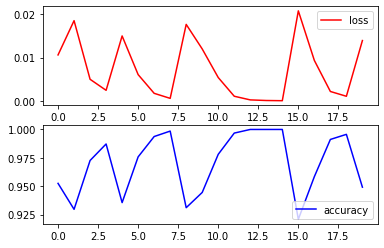

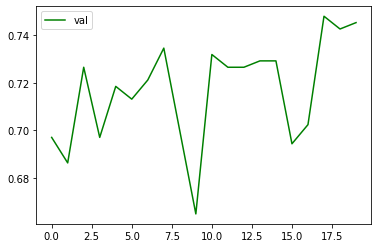

epoch: 1 train loss: 0.006179, train accuracy 0.978407 validation accuracy: 0.729223
epoch: 2 train loss: 0.000827, train accuracy 0.998081 validation accuracy: 0.734584
epoch: 3 train loss: 0.000185, train accuracy 1.000000 validation accuracy: 0.737265
epoch: 4 train loss: 0.000068, train accuracy 1.000000 validation accuracy: 0.739946
epoch: 5 train loss: 0.000034, train accuracy 1.000000 validation accuracy: 0.745308
test accu 0.732620320855615


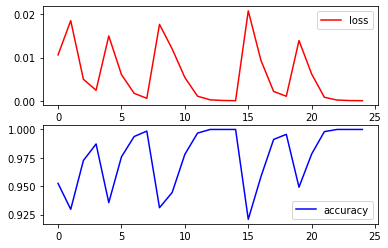

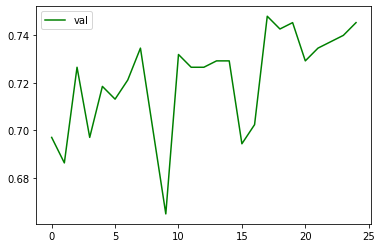

epoch: 1 train loss: 0.014873, train accuracy 0.943218 validation accuracy: 0.718499
epoch: 2 train loss: 0.009271, train accuracy 0.962892 validation accuracy: 0.672922
epoch: 3 train loss: 0.002579, train accuracy 0.989603 validation accuracy: 0.734584
epoch: 4 train loss: 0.001362, train accuracy 0.995361 validation accuracy: 0.667560
epoch: 5 train loss: 0.009865, train accuracy 0.960333 validation accuracy: 0.667560
test accu 0.6537433155080213


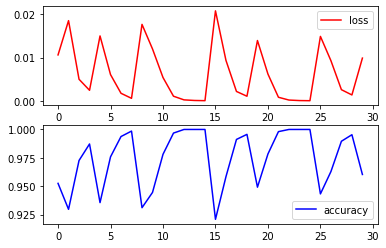

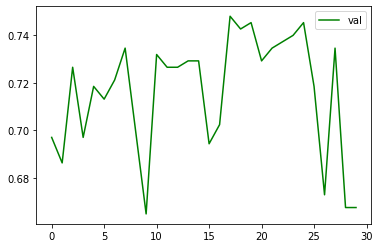

epoch: 1 train loss: 0.003544, train accuracy 0.985925 validation accuracy: 0.699732


In [ ]:
model = DriveNet().to(DEVICE)
model = torch.load('./save/max.pth')
# 交叉熵损失函数
# A83, D33, W868, WA119, WD133
criterion = nn.CrossEntropyLoss(torch.Tensor([1.1, 3, 5, 0.11, 1, 1]).to(DEVICE))
# 优化器
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
loss_list_all = []
accuracy_list_all = []
val_list_all = []
for j in range(10):
    ll, al, vl = Train(train_loader, val_loader, model, criterion, optimizer, 5)
    loss_list_all += ll
    accuracy_list_all += al
    val_list_all += vl
    test_accu = Test(test_loader, model)
    print("test accu", test_accu)
    if test_accu > max:
        max = test_accu
        torch.save(model, './save/max.pth')

    Draw(loss_list_all, accuracy_list_all, val_list_all)

In [ ]:
# for j in range(2):
#     ll, al, vl = Train(train_loader, val_loader, model, criterion, optimizer, 5)
#     loss_list_all += ll
#     accuracy_list_all += al
#     val_list_all += vl
#     Draw(loss_list_all, accuracy_list_all, val_list_all)

In [ ]:
for j in range(10):
    ll, al, vl = Train(train_loader, val_loader, model, criterion, optimizer, 5)
    loss_list_all += ll
    accuracy_list_all += al
    val_list_all += vl
    test_accu = Test(test_loader, model)
    if test_accu > max:
        max = test_accu
        torch.save(model, './save/max.pth')

    Draw(loss_list_all, accuracy_list_all, val_list_all)

### Test

In [ ]:
test_accu = Test(test_loader, model, True)
print("test accuracy:", test_accu)

In [ ]:
print(max)

In [ ]:
torch.save(model, './save/temp.pth')